In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from statistics import mode
pl.style.use('fivethirtyeight')

In [2]:
train=pd.read_csv('titanic_train.csv')
test=pd.read_csv('titanic_test.csv')

In [3]:
train.head(2)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0


In [4]:
test.head(2)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,295,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C,B,NaN,"Haverford, PA"
1,1150,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S,NaN,NaN,NaN


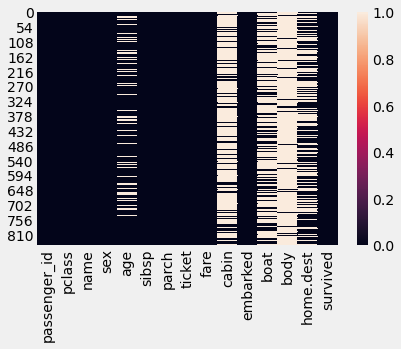

In [5]:
sns.heatmap(train.isnull())

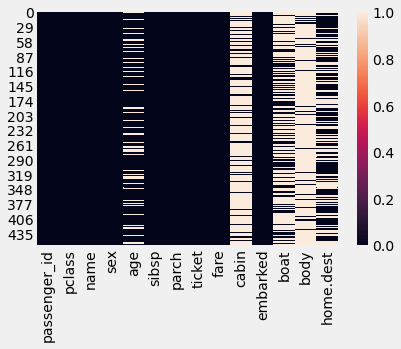

In [6]:
sns.heatmap(test.isnull())

In [7]:
train.describe()

,passenger_id,pclass,age,sibsp,parch,fare,body,survived
count,850.000000,850.00000,676.000000,850.000000,850.000000,849.000000,73.000000,850.000000
mean,662.816471,2.32000,29.519847,0.522353,0.382353,34.012701,165.821918,0.368235
std,380.751936,0.83853,14.562243,1.112132,0.879511,53.705779,99.068487,0.482610
min,1.000000,1.00000,0.166700,0.000000,0.000000,0.000000,4.000000,0.000000
25%,332.250000,2.00000,20.000000,0.000000,0.000000,7.895800,75.000000,0.000000
50%,676.500000,3.00000,28.000000,0.000000,0.000000,14.108300,166.000000,0.000000
75%,992.250000,3.00000,37.000000,1.000000,0.000000,31.000000,260.000000,1.000000
max,1307.000000,3.00000,80.000000,8.000000,9.000000,512.329200,328.000000,1.000000


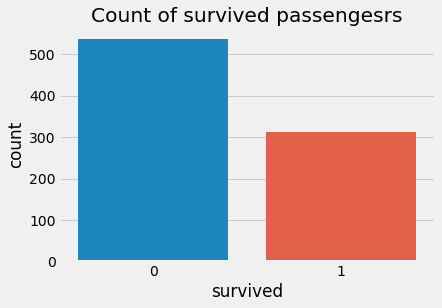

In [8]:
pl.title("Count of survived passengesrs")
sns.countplot(train.survived)

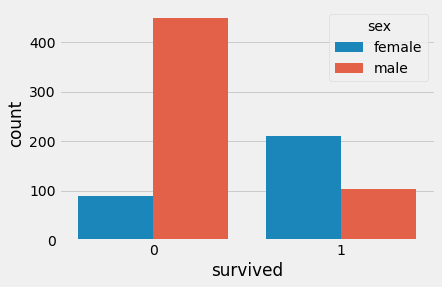

In [9]:
sns.countplot(data=train,x='survived',hue='sex')

In [10]:
train.head(2)

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0


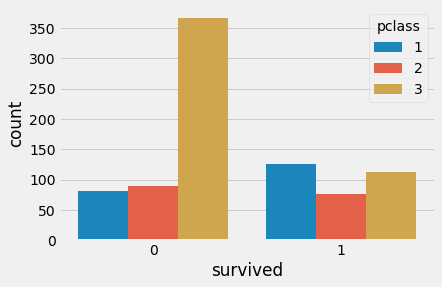

In [11]:
sns.countplot(data=train,x='survived',hue='pclass')

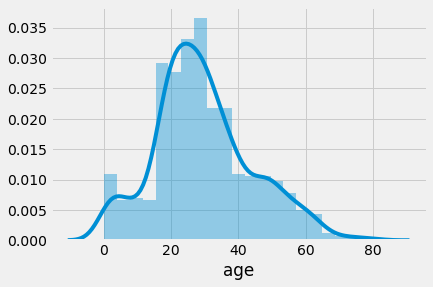

In [12]:
sns.distplot(train['age'])

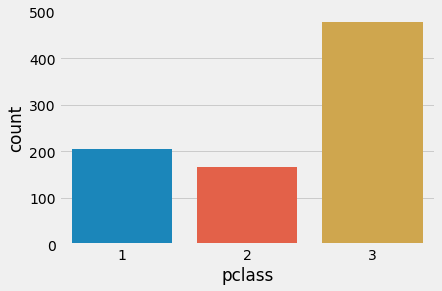

In [13]:
sns.countplot(data=train,x='pclass')

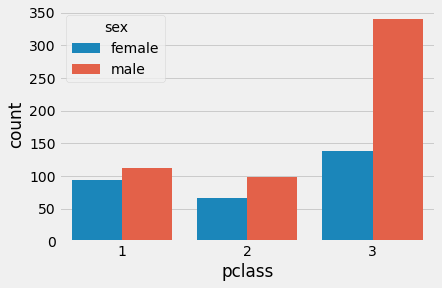

In [14]:
sns.countplot(data=train,x='pclass',hue='sex')

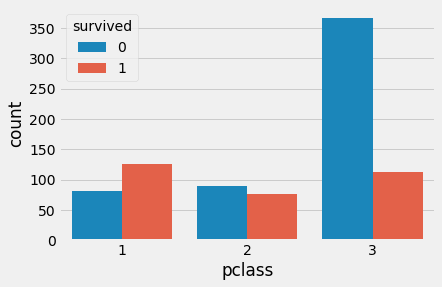

In [15]:
sns.countplot(data=train,x='pclass',hue='survived')

In [16]:
pclass1=train[train['pclass']==1]['survived'].value_counts(normalize=True)[0]*100
pclass2=train[train['pclass']==2]['survived'].value_counts(normalize=True)[0]*100
pclass3=train[train['pclass']==3]['survived'].value_counts(normalize=True)[0]*100

In [17]:
print('PClass 1 : {:.1f}% people survived'.format(pclass1))
print('PClass 2 : {:.1f}% people survived'.format(pclass2))
print('PClass 3 : {:.1f}% people survived'.format(pclass3))

PClass 1 : 39.3% people survived
PClass 2 : 54.2% people survived
PClass 3 : 76.6% people survived


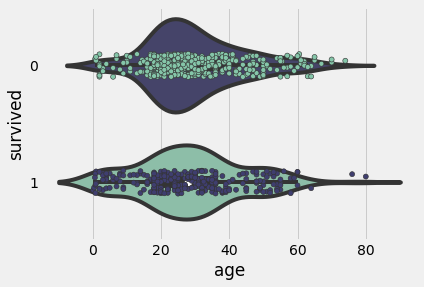

In [18]:

sns.violinplot(y='survived',x='age',data=train,
           palette=["#3f3e6fd1", "#85c6a9"],fliersize =0, orient = 'h')
sns.stripplot(y = 'survived', x = 'age', data = train,
     linewidth = 0.6, palette=["#85c6a9","#3f3e6fd1"], orient = 'h')

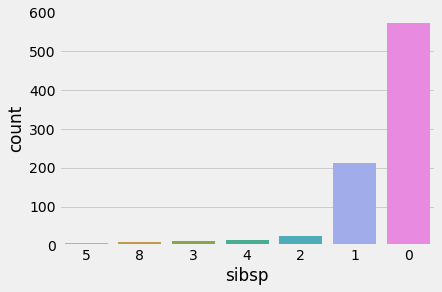

In [19]:
sns.countplot(train['sibsp'],order=[5,8,3,4,2,1,0])

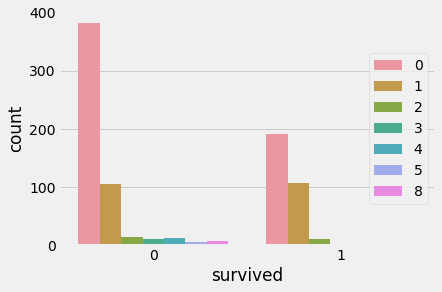

In [20]:
sns.countplot(data=train,x='survived',hue='sibsp')
pl.legend(loc='right')

In [21]:
train['embarked']

0      Q
1      S
2      S
3      S
4      S
      ..
845    S
846    C
847    S
848    S
849    S
Name: embarked, Length: 850, dtype: object

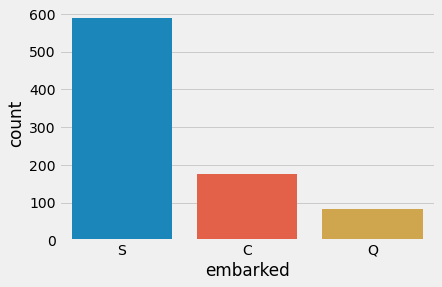

In [22]:
sns.countplot(train['embarked'],order=['S','C','Q'])

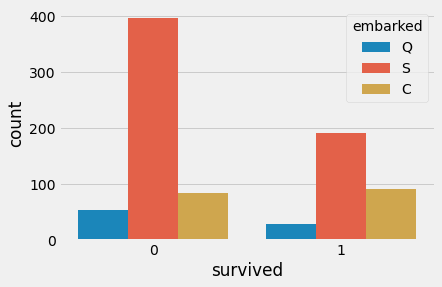

In [23]:
sns.countplot(data=train,x='survived',hue='embarked')

Text(0.5, 1.0, 'Correlation Matrix')

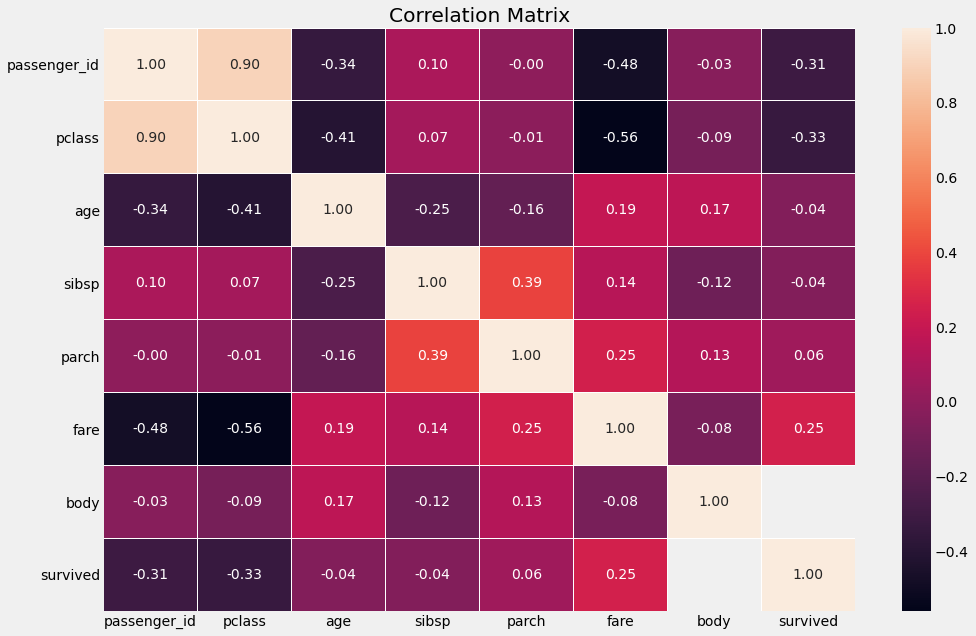

In [24]:
pl.figure(figsize=(15,10))
sns.heatmap(train.corr(),annot=True,fmt='.2f',linewidths=0.1)
pl.title("Correlation Matrix")

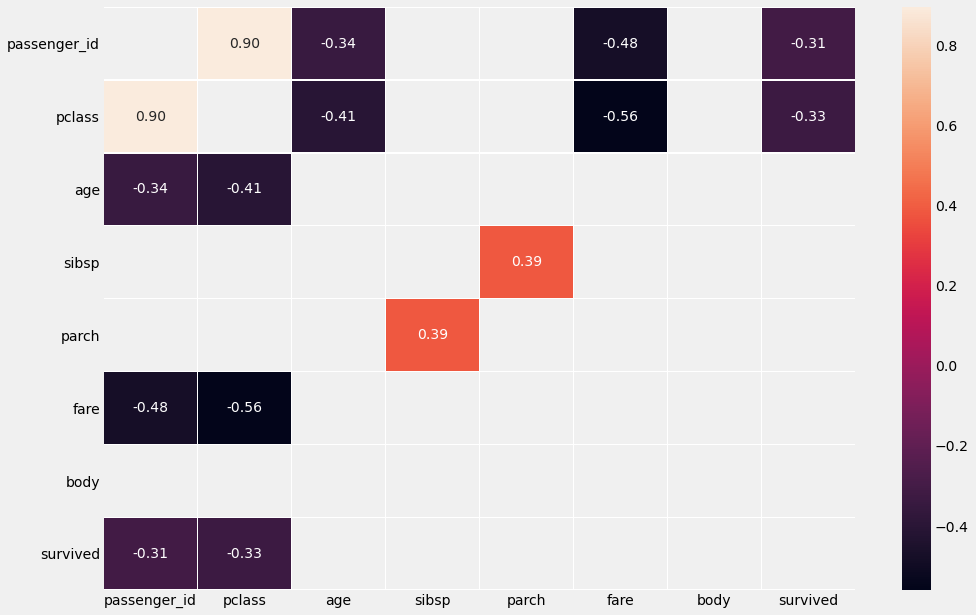

In [25]:
pl.figure(figsize=(15,10))
corr=train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)],linewidths=.5, fmt= '.2f',annot=True)

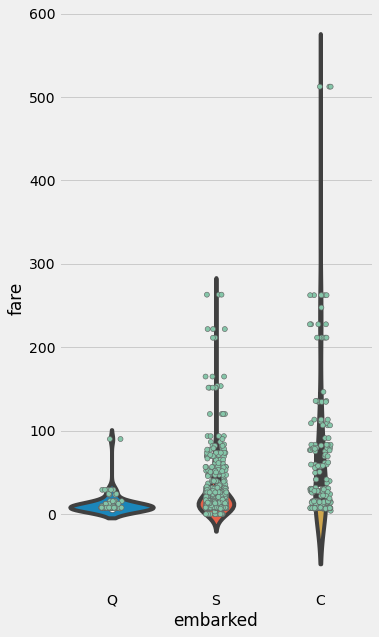

In [26]:
pl.figure(figsize=(5,10))
sns.violinplot(data=train,x='embarked',y='fare')
sns.stripplot(y = 'fare', x = 'embarked', data = train,
     linewidth = 0.6, palette=["#85c6a9","#85c6a9","#85c6a9"], orient = 'v')

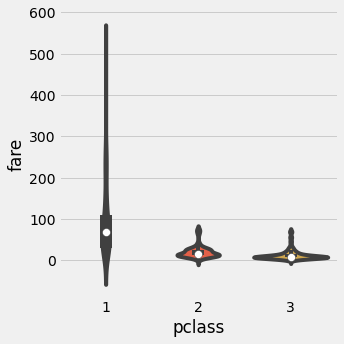

In [27]:
sns.catplot(x='pclass',y='fare',data=train,kind='violin')

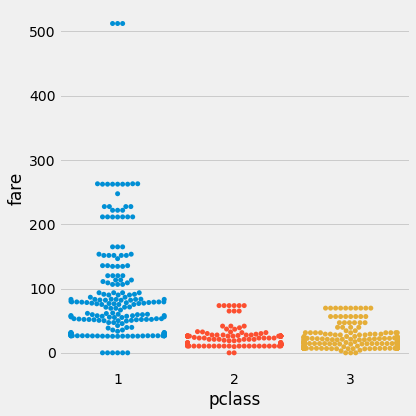

In [28]:
sns.catplot(x='pclass',y='fare',data=train,kind='swarm',height=6)
pl.tight_layout()

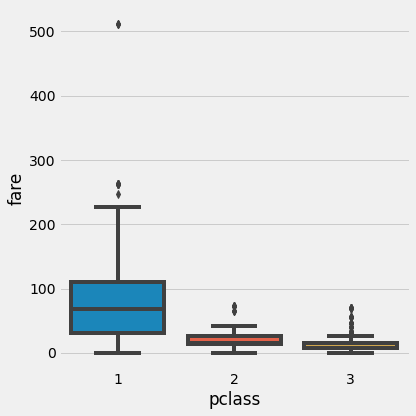

In [29]:
sns.catplot(x='pclass',y='fare',data=train,kind='box',height=6)
pl.tight_layout()

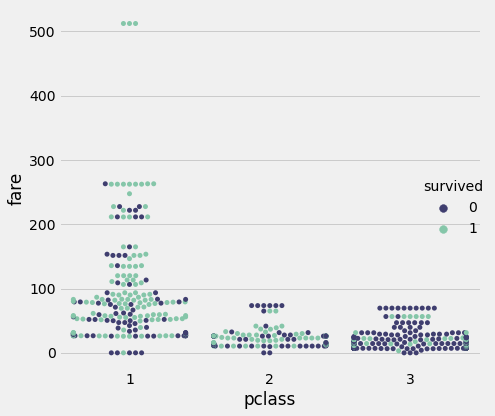

In [30]:
sns.catplot(x='pclass',y='fare',data=train,kind='swarm',height=6,
            hue='survived',palette=["#3f3e6fd1", "#85c6a9"])
pl.tight_layout()

In [31]:
train.drop(columns=['home.dest'],inplace=True)

In [32]:
test.drop(columns='home.dest',inplace=True)

In [33]:
train.drop(columns=['boat','body'],inplace=True)
test.drop(columns=['boat','body'],inplace=True)

In [34]:
train.isnull().sum()

passenger_id      0
pclass            0
name              0
sex               0
age             174
sibsp             0
parch             0
ticket            0
fare              1
cabin           659
embarked          1
survived          0
dtype: int64

In [35]:
test.isna().sum()

passenger_id      0
pclass            0
name              0
sex               0
age              89
sibsp             0
parch             0
ticket            0
fare              0
cabin           355
embarked          1
dtype: int64

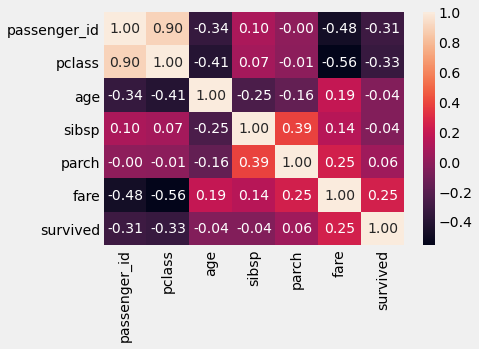

In [36]:
sns.heatmap(train.corr(),annot=True,fmt='.2f')

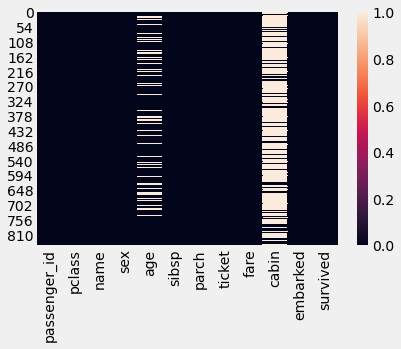

In [37]:
sns.heatmap(train.isnull())

In [38]:
train.loc[train.age.isnull(),'age']=train.groupby('pclass').age.transform('median')

In [39]:
test.loc[test.age.isnull(),'age']=test.groupby('pclass').age.transform('median')

In [40]:
train['embarked']=train['embarked'].fillna(mode(train['embarked']))
test['embarked']=test['embarked'].fillna(mode(test['embarked']))


In [41]:
train['fare']=train['fare'].fillna(train['fare'].median())

In [42]:
train['cabin'].fillna('U',inplace=True)
test['cabin'].fillna('U',inplace=True)

In [43]:
train.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1216,3,"Smyth, Miss. Julia",female,24.0,0,0,335432,7.7333,U,Q,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,U,S,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,U,S,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,U,S,1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,U,S,0


In [44]:
train['sex'][train['sex']=='male']=0
train['sex'][train['sex']=='female']=1
test['sex'][test['sex']=='male']=0
test['sex'][test['sex']=='female']=1

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
encoder=OneHotEncoder()
temp=pd.DataFrame(encoder.fit_transform(train[['embarked']]).toarray(),columns=['S','C','Q'])

In [47]:
train=train.join(temp)

In [48]:
train.drop(columns='embarked',inplace=True)

In [49]:
temp=pd.DataFrame(encoder.fit_transform(test[['embarked']]).toarray(),
                 columns=['S','C','Q'])

In [50]:
test=test.join(temp)
test.drop(columns='embarked',inplace=True)

In [51]:
train['cabin'][:20]

0       U
1       U
2       U
3       U
4       U
5       U
6       U
7       U
8       U
9       U
10    C82
11    D15
12    C50
13      U
14      U
15      U
16      U
17      U
18    E33
19      U
Name: cabin, dtype: object

In [52]:
train['cabin'] = train['cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['cabin'] = test['cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [53]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [54]:
np.unique(train['cabin']),np.unique(test['cabin'])

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'U'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'U'], dtype=object))

In [55]:
train['cabin']=enc.fit_transform(train['cabin'])
test['cabin']=enc.transform(test['cabin'])

In [56]:
train['name']

0                                     Smyth, Miss. Julia
1                                        Cacic, Mr. Luka
2      Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...
3                  Hocking, Mrs. Elizabeth (Eliza Needs)
4                                        Veal, Mr. James
                             ...                        
845                          Hipkins, Mr. William Edward
846                              Kent, Mr. Edward Austin
847                  Kantor, Mrs. Sinai (Miriam Sternin)
848                            Peacock, Miss. Treasteall
849                                Greenberg, Mr. Samuel
Name: name, Length: 850, dtype: object

In [57]:
train['name']=train['name'].str.extract('([A-Za-z]+)\.',expand=False)
test['name']=test['name'].str.extract('([A-Za-z]+)\.',expand=False)

In [58]:
train.rename(columns={'name':'title'},inplace=True)

In [59]:
test.rename(columns={'name':'title'},inplace=True)

In [60]:
train['title']=train['title'].replace(['Dr', 'Ms', 'Mme', 'Col', 'Sir',
       'Rev', 'Major', 'Jonkheer', 'Capt', 'Countess', 'Mlle'],'other')

In [61]:
test['title']=test['title'].replace(['Dr', 'Mlle', 'Rev', 'Ms', 'Col',
       'Don', 'Lady', 'Dona'],'other')

In [62]:
train['title'].value_counts(normalize=True)*100

Mr        57.411765
Miss      20.117647
Mrs       14.470588
Master     5.411765
other      2.588235
Name: title, dtype: float64

In [63]:
encoder=OneHotEncoder()
temp=pd.get_dummies(train['title'],drop_first=True)
train=train.join(temp)
train.drop(columns='title',inplace=True)

In [64]:
temp=pd.get_dummies(test['title'],drop_first=True)
test=test.join(temp)
test.drop(columns='title',inplace=True)

In [65]:
test

,passenger_id,pclass,sex,age,sibsp,parch,ticket,fare,cabin,S,C,Q,Miss,Mr,Mrs,other
0,295,1,0,17.0,0,2,17421,110.8833,2,1.0,0.0,0.0,0,1,0,0
1,1150,3,0,24.0,0,0,364498,14.5000,8,0.0,0.0,1.0,0,1,0,0
2,89,1,0,31.0,1,0,F.C. 12750,52.0000,1,0.0,0.0,1.0,0,1,0,0
3,1063,3,0,41.0,0,0,SOTON/O2 3101272,7.1250,8,0.0,0.0,1.0,0,1,0,0
4,1020,3,0,21.0,0,0,349211,7.8958,8,0.0,0.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1194,3,0,24.0,0,0,349222,7.8958,8,0.0,0.0,1.0,0,1,0,0
455,403,2,0,23.0,0,0,29751,13.0000,8,0.0,0.0,1.0,0,1,0,0
456,108,1,1,39.0,0,0,17421,110.8833,8,1.0,0.0,0.0,1,0,0,0
457,510,2,0,16.0,0,0,S.O./P.P. 3,10.5000,8,0.0,0.0,1.0,0,1,0,0


In [66]:
train['familysize']=train['sibsp']+train['parch']+1
test['familysize']=test['sibsp']+test['parch']+1

In [67]:
train.drop(columns=['sibsp','parch','ticket'],inplace=True)
test.drop(columns=['sibsp','parch','ticket'],inplace=True)

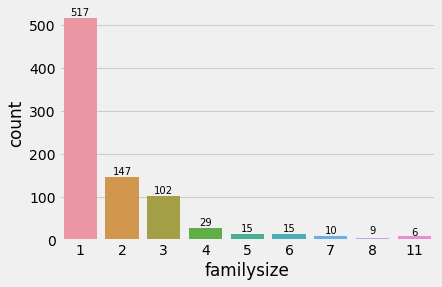

In [68]:
labels=train['familysize'].value_counts()
ax=sns.countplot(train['familysize'],)
for i,j in enumerate(labels):
    ax.text(i,j+5,str(j),horizontalalignment='center',size=10,color='black')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

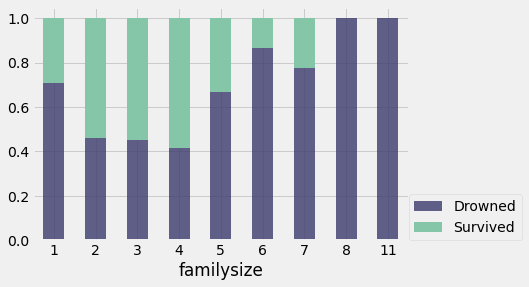

In [69]:
train.groupby('familysize')['survived'].value_counts(normalize=True).unstack().plot.bar(color=["#3f3e6fd1", "#85c6a9"],stacked=True)
pl.legend(["Drowned","Survived"],loc=(1,0))
pl.xticks(rotation=0)

([<matplotlib.axis.XTick at 0x231288d2c48>,
 [Text(0, 0, 'Male'), Text(0, 0, 'Female')])

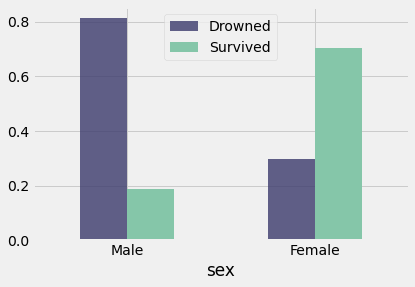

In [70]:
train.groupby('sex')['survived'].value_counts(normalize=True).unstack().plot(color=["#3f3e6fd1", "#85c6a9"],kind='bar')
pl.legend(['Drowned','Survived'])
pl.xticks(range(2),['Male','Female'],rotation=0)


In [71]:
train.drop(columns=['passenger_id'],inplace=True)
test.drop(columns=['passenger_id'],inplace=True)

In [72]:
train.columns,test.columns

(Index(['pclass', 'sex', 'age', 'fare', 'cabin', 'survived', 'S', 'C', 'Q',
        'Miss', 'Mr', 'Mrs', 'other', 'familysize'],
       dtype='object'),
 Index(['pclass', 'sex', 'age', 'fare', 'cabin', 'S', 'C', 'Q', 'Miss', 'Mr',
        'Mrs', 'other', 'familysize'],
       dtype='object'))

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [85]:
X_train,X_test,y_train,y_test=train_test_split(train.drop(columns='survived'),train['survived'],test_size=0.3)

In [86]:
linear=LinearRegression()
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [87]:
linear.score(X_train,y_train),linear.score(X_test,y_test)

(0.4192542795283797, 0.4000882008305219)

In [88]:
linear=LogisticRegression()
linear.fit(X_train,y_train)
linear.score(X_train,y_train),linear.score(X_test,y_test)

(0.8285714285714286, 0.8156862745098039)

In [89]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [90]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [91]:
linear=LogisticRegression(max_iter=10000,C=10)
linear.fit(X_train_scaled,y_train)
linear.score(X_train_scaled,y_train),linear.score(X_test_scaled,y_test)

(0.8319327731092437, 0.8235294117647058)

In [92]:
from sklearn.svm import SVC
linear=SVC()
linear.fit(X_train_scaled,y_train)
linear.score(X_train_scaled,y_train),linear.score(X_test_scaled,y_test)

(0.8453781512605042, 0.8196078431372549)

In [93]:
from sklearn.ensemble import RandomForestClassifier
linear=RandomForestClassifier(max_depth=1000,criterion='entropy')
linear.fit(X_train_scaled,y_train)
linear.score(X_train_scaled,y_train),linear.score(X_test_scaled,y_test)

(0.9781512605042016, 0.8274509803921568)

In [94]:
from sklearn.tree import DecisionTreeClassifier
linear=DecisionTreeClassifier(max_depth=1000)
linear.fit(X_train_scaled,y_train)
linear.score(X_train_scaled,y_train),linear.score(X_test_scaled,y_test)

(0.9781512605042016, 0.7764705882352941)

In [95]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear=PassiveAggressiveClassifier()
linear.fit(X_train_scaled,y_train)
linear.score(X_train_scaled,y_train),linear.score(X_test_scaled,y_test)

(0.8, 0.8)